# TP : Régression et Machine Learning 

## Imports

In [563]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import numpy.random as rnd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeClassifier, LogisticRegression
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Régression OLS et Ridge

### Import des données

In [564]:
data1 = np.load('data1.npy')
data2 = np.load('data2.npy')
data3 = np.load('data3.npy')

len_data1 = len(data1[0, :])
len_data2 = len(data2[0, :])
len_data3 = len(data3[0, :])

### OLS

In [565]:
def Reg_lin(X,y): # Régression Linéaire 
    coeff=np.linalg.inv(np.dot(np.transpose(X),X))
    coeff=np.dot(coeff,np.transpose(X))
    coeff=np.dot(coeff,y)
    return coeff

def erreur_apprentissage(y, y_pred,len_data):
    err = 1 / len_data * sum((y - y_pred)**2)
    print("L'erreur d'apprentissage est de : ", err)
    
def X_create(q,x):
    X=[[x[i]**j for j in range(0,q+1)] for i in range(len(x))]
    return X

def OLS(x, y, q): 
    len_data = len(x)
    X=X_create(q,x)

    x_data = x
    y_data = y

    # Use only one feature
    x_data = x_data[:, np.newaxis]

    # Split the data into training/testing sets
    x_train = x_data[:-len_data//2]
    x_test = x_data[-len_data//2:]

    # Split the targets into training/testing sets
    y_train = y_data[:-len_data//2]
    y_test = y_data[-len_data//2:]

    # Create linear regression object
    regr = LinearRegression()
    a=Reg_lin(X,y)
    
    # Train the model using the training sets
    regr.fit(x_train, y_train)
    
    # Make predictions using the testing set
    y_pred = regr.predict(x_test)

    return x_test, y_test, y_pred, a

#### data1

In [566]:
x = np.array(data1[0, :])
y = np.array(data1[1, :])
x_test, y_test, y_pred, a = OLS(x, y, 1)

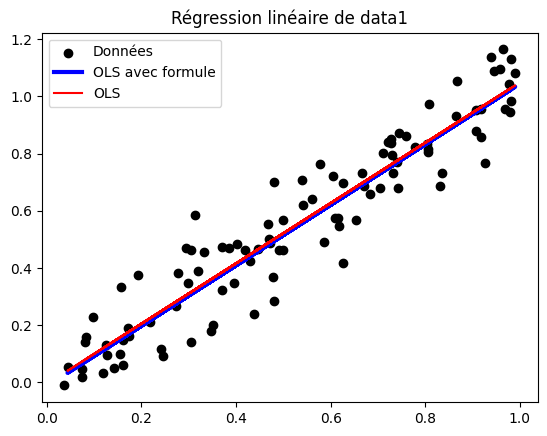

In [567]:
plt.figure()
plt.scatter(x, y, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)
plt.plot(x_test,a[1]*x_test+a[0], color="red")
plt.legend(["Données", "OLS avec formule","OLS"])
plt.title("Régression linéaire de data1")
plt.show()

In [568]:
erreur_apprentissage(y_test, y_pred, len_data1)

L'erreur d'apprentissage est de :  0.004901669429676018


#### data2

In [569]:
x = np.array(data2[0, :])
y = np.array(data2[1, :])
q=1
x_test, y_test, y_pred, a = OLS(x, y, q)

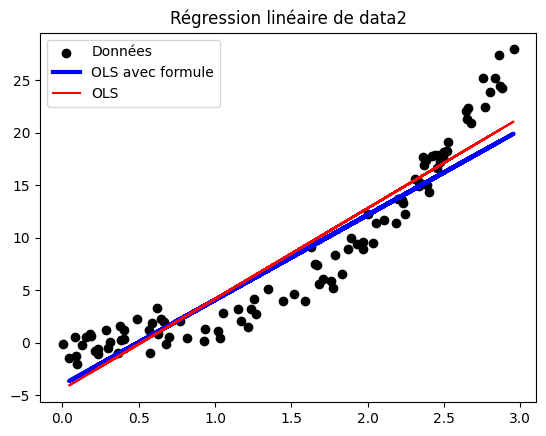

In [570]:
plt.scatter(x, y, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)
plt.plot(x_test,a[1]*x_test+a[0], color="red")
plt.legend(["Données", "OLS avec formule","OLS"])
plt.title("Régression linéaire de data2")
plt.show()

In [571]:
erreur_apprentissage(y_test, y_pred, len_data2)

L'erreur d'apprentissage est de :  4.625722223314219


Question 2 : On constate que l'erreur d'apprentissage pour $\texttt{data2}$ est presque 1000 fois supérieure à celle de $\texttt{data1}$. Autrement dit, la régression linéaire appliquée à $\texttt{data2}$ est bien moins efficace que pour $\texttt{data1}$. On peut l'observer sur les deux schémas précédents : les données de $\texttt{data1}$ suivent la droite de régression tandis que celle de $\texttt{data2}$ ont une allure plutôt parabolique. 

### Espace de redescription

Question 3

#### Data2  

In [572]:
x = np.array(data2[0, :])
y = np.array(data2[1, :])

x_data = np.sort(x)
y_data = y
q = 2

In [573]:
x_test, y_test, y_pred, coeff = OLS(x, y, q)
fx = coeff[1]*x_data + coeff[2] * x_data**2

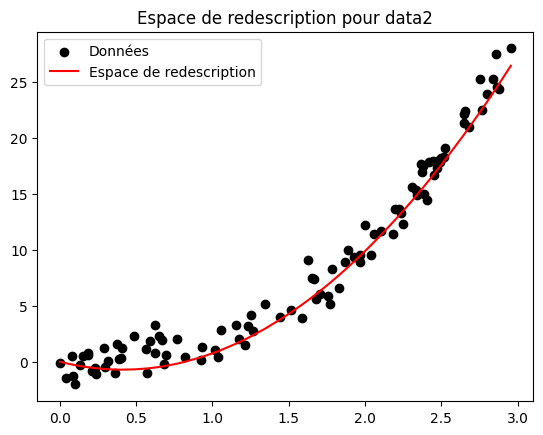

In [574]:
plt.scatter(x, y, color="black")
plt.plot(x_data, fx, 'r-')
plt.title("Espace de redescription pour data2")
plt.legend(["Données", "Espace de redescription"])
plt.show()

In [575]:
erreur_apprentissage(y_test, y_pred, len_data2)

L'erreur d'apprentissage est de :  4.625722223314219


// EC : L'erreur d'apprentissage est censée être bien inférieure non ? Je me demande s'il n'y a pas une erreur.

Question 4 :

#### Data3

In [576]:
x = np.array(data3[0, :])
y = np.array(data3[1, :])

x_data = np.sort(x)
y_data = y
q = 10
x_test, y_test, y_pred, coeff = OLS(x, y, q)
fx=coeff[0]
for i in range(1,q+1):
    fx = fx + coeff[i]*(x_data**i)

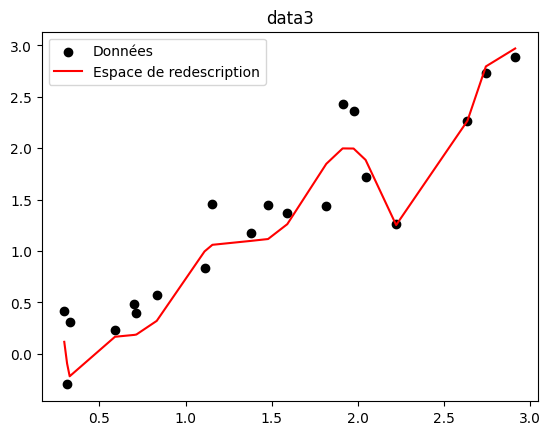

In [577]:
plt.figure()
plt.scatter(x, y, color="black")
plt.plot(x_data, fx, 'r-')
plt.title("data3")
plt.legend(["Données", "Espace de redescription"])
plt.show()

In [578]:
erreur_apprentissage(y_test, y_pred, len_data3)

L'erreur d'apprentissage est de :  0.04715697671639722


Question 5 : On observe que l'erreur d'apprentissage est très faible, ce qui démontre bien que la régression OLS d'ordre 10 est efficace pour $\texttt{data3}$. On observe également cette précision sur le schéma précédent. 

### RIDGE

Question 6 : 

In [579]:
def RIDGE(X, y, lamb):
    # Ajouter une colonne de 1 pour le terme d'interception
    X = np.vstack([np.ones(len(X)), X]).T

    # Créer et ajuster le modèle Ridge
    ridge = Ridge(alpha=lamb)
    ridge.fit(X, y)

    # Récupérer les coefficients
    intercept = ridge.intercept_
    coef = ridge.coef_

    return intercept, coef

In [580]:
x = np.array(data3[0, :])
y = np.array(data3[1, :])
lamb = 2

intercept, coef = RIDGE(x, y, lamb)
x_test, y_test, y_pred, a = OLS(x, y, 1)

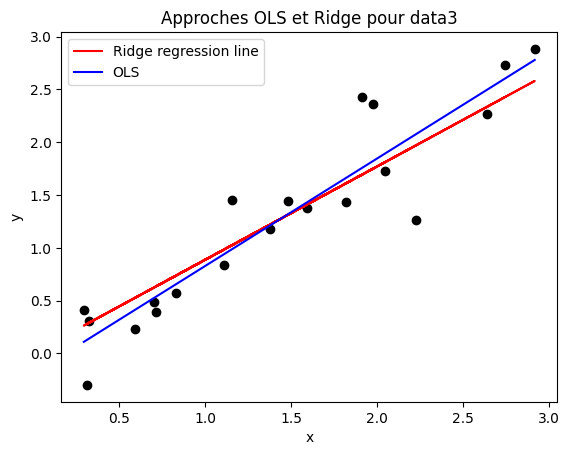

In [581]:
plt.figure()
plt.scatter(x, y, color='black')
plt.plot(x, intercept + coef[1] * x, color='red', label='Ridge regression line')
#plt.plot(x_test, y_pred, color="green", label="OLS de Python") # EC : un peu inutile non ? 
plt.plot(x_data,a[1]*x_data+a[0], color="blue", label="OLS")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Approches OLS et Ridge pour data3')
plt.show()

In [582]:
print("OLS : ")
erreur_apprentissage(y_test, y_pred, len_data3)

print("Ridge : ")
erreur_apprentissage(y, intercept + coef[1] * x, len_data3)

OLS : 
L'erreur d'apprentissage est de :  0.04715697671639722
Ridge : 
L'erreur d'apprentissage est de :  0.12109181789196798


Nous remarquons que les approches OLS et Ridge permettent d'obtenir des résultats relativement similaires et satisfaisants. 

En modifiant le paramètre $\lambda$, on obtient toutefois des coefficients différents pour l'approche **Ridge**. En effet, le tableau suivant répertorie des différentes valeurs des erreurs d'apprentissage en fonction de la valeur de $\lambda$. On remarque que plus $\lambda$ est faible, plus l'erreur d'apprentissage pour Ridge est faible. 

Néanmoins, on peut déduire que la méthode OLS d'ordre 1 est plus efficace que la méthode Ridge. 

| Lambda | Erreur OLS | Erreur Ridge |
|--------|------------|--------------|
| 0.01   | 0.047      | 0.109        |
| 0.25   | 0.047      | 0.109        |
| 0.5    | 0.047      | 0.111        |
| 1      | 0.047      | 0.112        |
| 2      | 0.047      | 0.121        |
| 4      | 0.047      | 0.146        |
| 6      | 0.047      | 0.176        |

### LASSO

In [583]:
x = np.array(data3[0, :])
y = np.array(data3[1, :])
xdata=x
ydata=y
x_sorted=np.sort(x)
q = 1

X = X_create(q,x)
coeff = Reg_lin(X, y)
fx = coeff[0]
for i in range(1,q+1):
    fx = fx + coeff[i]*(x_sorted**i)  

xdata = np.vstack([np.ones(len(xdata)), xdata]).T
x_train = xdata[:-len_data3//2]
x_test = xdata[-len_data3//2:]
y_train = ydata[:-len_data3//2]

clf = Lasso(alpha=0.1)
clf.fit(x_train,y_train)

Lasso(alpha=0.1)

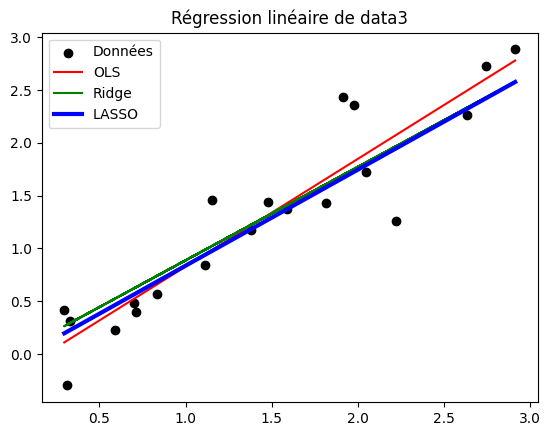

In [584]:
plt.scatter(x, y, color="black")
plt.plot(x_sorted, fx, 'r-')
plt.plot(x, intercept + coef[1] * x, color='green')
plt.plot(x_sorted, clf.intercept_ + x_sorted * clf.coef_[1], color="blue", linewidth=3)
plt.legend(["Données", "OLS", "Ridge", "LASSO"])
plt.title("Régression linéaire de data3")
plt.show()

In [585]:
print("OLS : ")
erreur_apprentissage(y_test, y_pred, len_data3)

print("Ridge : ")
erreur_apprentissage(y, intercept + coef[1] * x, len_data3)

print("LASSO : ")
erreur_apprentissage(y, clf.intercept_ + x_sorted * clf.coef_[1], len_data3)

OLS : 
L'erreur d'apprentissage est de :  0.04715697671639722
Ridge : 
L'erreur d'apprentissage est de :  0.12109181789196798
LASSO : 
L'erreur d'apprentissage est de :  1.8018076343159313


Question 8 : 

L'erreur d'apprentissage est nettement plus élevée par l'approche LASSO. 

// EC : trouver plus de trucs à dire peut-être

## Classification

In [586]:
################################################################################
# PARAMETERS
################################################################################
# Dimension and sample size
p=2
n=600
# Proportion of sample from classes 0, 1, and outliers
p0 = 3/6
p1 = 2/6
pout = 1/6
# Examples of means/covariances of classes 0, 1 and outliers
mu0 = np.array([-2,-2])
mu1 = np.array([2,2])
muout = np.array([-8,-8])
Sigma_ex1 = np.eye(p)
Sigma_ex2 = np.array([[5, 0.1],
                      [1, 0.5]])
Sigma_ex3 = np.array([[0.5, 1],
                      [1, 5]])
Sigma0 = Sigma_ex1
Sigma1 = Sigma_ex1
Sigmaout = Sigma_ex1
# Regularization coefficient
lamb = 0

################################################################################
# DATA/LABELS GENERATION
################################################################################
# Sample sizes
n0 = int(n*p0)
n1 = int(n*p1)
nout = int(n*pout)
# Data and labels
mu0_mat = mu0.reshape((p,1))@np.ones((1,n0))
mu1_mat = mu1.reshape((p,1))@np.ones((1,n1))
x0 = np.zeros((p,n0+nout))
x0[:,0:n0] = mu0_mat + la.sqrtm(Sigma0)@rnd.randn(p,n0)
x1 = mu1_mat + la.sqrtm(Sigma1)@rnd.randn(p,n1)
if nout > 0:
  muout_mat = muout.reshape((p,1))@np.ones((1,nout))
  x0[:,n0:n0+nout] = muout_mat + la.sqrtm(Sigmaout)@rnd.randn(p,nout)
y = np.concatenate((-np.ones(n0+nout),np.ones(n1)))
X = np.ones((n,p+1))
for i in np.arange(n):
     X[0:n0+nout,1:p+1] = x0.T
     X[n0+nout:n,1:p+1] = x1.T

### Classifieurs OLS/Ridge

Question 1  

In [587]:
# Distances aux hyperplans 
def distance_hyperplan(x, labels, intercept, coef):
  norme_beta = np.sqrt(np.sum(coef**2))
  distances = np.zeros(len(x))
  for i in range(len(x)):
    distances[i] = labels[i] * (coef[0] * x[i] + intercept) / norme_beta
  return distances

# Equation de l'hyperplan
def hyperplan(x, y, intercept, coef, point_min):
  m = - 1 / coef[0]
  b = point_min[1] - m * point_min[0]
  return m * x + b

def milieu(x, y):
  return (x + y) / 2

# Concaténation des données
labels = y
x_classes = np.concatenate((x0[0,:], x1[0,:]))
y_classes = np.concatenate((x0[1,:], x1[1,:]))

# Obtenir les coefficients OLS et Ridge pour chaque classe
x_ols, y_test, y_ols, coef_ols = OLS(x_classes, y_classes, 1)
intercept_ridge, coef_ridge = RIDGE(x_classes, y_classes, lamb=1.0)
coef_ridge = coef_ridge[1:]
y_ridge = intercept_ridge + coef_ridge[0] * x_classes
x_ridge = x_classes

# On récupère le point le plus proche de l'hyperplan pour CHAQUE classe de données
distances_class0 = distance_hyperplan(x0[0,:], -np.ones(len(x0[0,:])), intercept_ridge, coef_ridge)
index_min_class0 = np.argmin(distances_class0)
distances_class1 = distance_hyperplan(x1[0,:], np.ones(len(x1[0,:])), intercept_ridge, coef_ridge)
index_min_class1 = np.argmin(distances_class1)

# On cherche ensuite le point situé au milieu de ces deux points pour déterminer l'équation de l'hyperplan
point_min = np.zeros(2)
point_min[0] = (x0[0,index_min_class0] + x1[0,index_min_class1]) / 2 # x
point_min[1] = (x0[1,index_min_class0] + x1[1,index_min_class1]) / 2 # y

hyperplan_equation_ridge = hyperplan(x_classes, y_classes, intercept_ridge, coef_ridge, point_min)
hyperplan_equation_ols = hyperplan(x_classes, y_classes, coef_ols[0], coef_ols[1:], point_min)

Question 2 : 

// EC : faire un tableau : https://www.tablesgenerator.com/markdown_tables

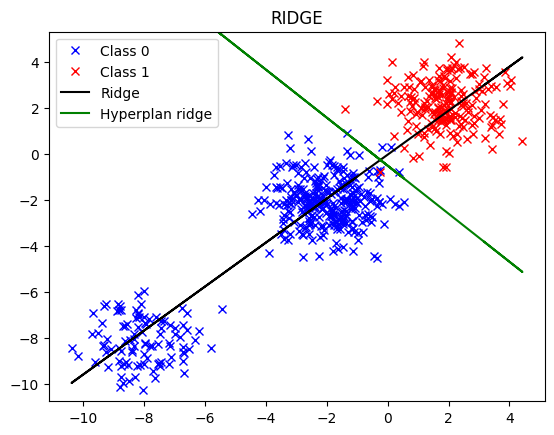

In [588]:
fig,ax = plt.subplots()
ax.plot(x0[0,:],x0[1,:],'xb',label='Class 0')
ax.plot(x1[0,:],x1[1,:],'xr',label="Class 1")
plt.plot(x_ridge, y_ridge, color='black', label='Ridge')
plt.plot(x_classes, hyperplan_equation_ridge, color="green", label="Hyperplan ridge")
ax.legend(loc = "upper left")
plt.ylim(np.min(x0[1,:])-0.5,np.max(x1[1,:])+0.5)
plt.title("RIDGE")
plt.show()

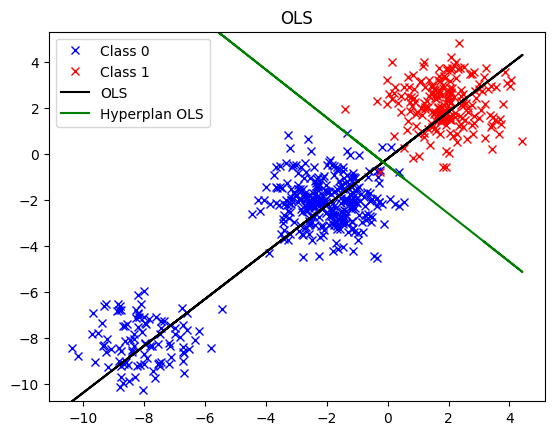

In [589]:
fig,ax = plt.subplots()
ax.plot(x0[0,:],x0[1,:],'xb',label='Class 0')
ax.plot(x1[0,:],x1[1,:],'xr',label="Class 1")
plt.plot(x_ols, x_ols * a[1] + a[0], color="black", label="OLS")
plt.plot(x_classes, hyperplan_equation_ols, color="green", label="Hyperplan OLS")
ax.legend(loc = "upper left")
plt.ylim(np.min(x0[1,:])-0.5,np.max(x1[1,:])+0.5)
plt.title("OLS")
plt.show()

### Régression Logistique

Question 3

In [590]:
def Reg_log(X,y,X_test, max_iter=1000):
  rlog = LogisticRegression(max_iter=max_iter)
  rlog.fit(X,y)
  Y_pred=rlog.predict(X_test)
  return rlog,Y_pred

rlog, y_pred = Reg_log(X,y,X[1:450,:])
coeff = rlog.coef_[0]
X_pred=np.linspace(-10,6,20)
Y_pred=-(coeff[1]/coeff[2])*X_pred-(coeff[0]/coeff[2])

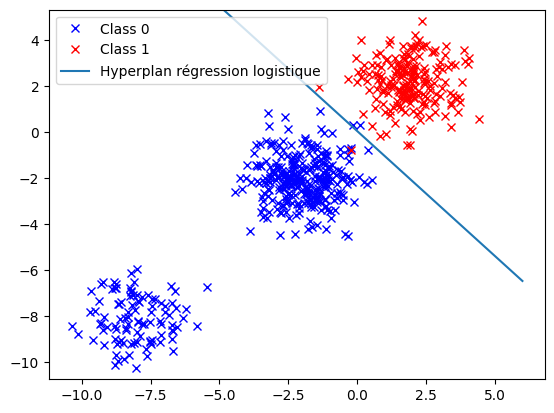

In [591]:
fig,ax = plt.subplots()
ax.plot(x0[0,:],x0[1,:],'xb',label='Class 0')
ax.plot(x1[0,:],x1[1,:],'xr',label="Class 1")
ax.plot(X_pred,Y_pred, label="Hyperplan régression logistique")
ax.legend(loc = "upper left")
plt.ylim(np.min(x0[1,:])-0.5,np.max(x1[1,:])+0.5)
plt.show()

Question 4

Question 5

## Tests sur la base de données MNIST

In [592]:
###############################################################################
# LOAD MNIST
###############################################################################
# Download MNIST
mnist = fetch_openml(data_id=554, parser='auto')
# copy mnist.data (type is pandas DataFrame)
data = mnist.data
# array (70000,784) collecting all the 28x28 vectorized images
img = data.to_numpy()
# array (70000,) containing the label of each image
lb = np.array(mnist.target,dtype=int)
# Splitting the dataset into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    img, lb, 
    test_size=0.25, 
    random_state=0)
# Number of classes
k = len(np.unique(lb))
# Sample sizes and dimension
(n,p) = img.shape
n_train = y_train.size
n_test = y_test.size 

### Régularisation l2

In [593]:
# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrainer le modèle de régression logistique
rlog, y_pred = Reg_log(X_train,y_train,X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
for i in range(0,len(cm)):
  cm[i,:]=100*(cm[i,:]).astype(float)/(np.sum(cm[i,:])).astype(float)

### Régularisation ℓ¹

In [594]:
def Reg_log_l1(X,y,X_test):
  rlog = LogisticRegression(penalty="l1", max_iter=1000, tol=0.01, solver="saga")
  rlog.fit(X,y)
  Y_pred=rlog.predict(X_test)
  return rlog,Y_pred

rlog_l1, y_pred_l1 = Reg_log_l1(X_train,y_train,X_test)
cm_l1 = confusion_matrix(y_test, y_pred_l1)

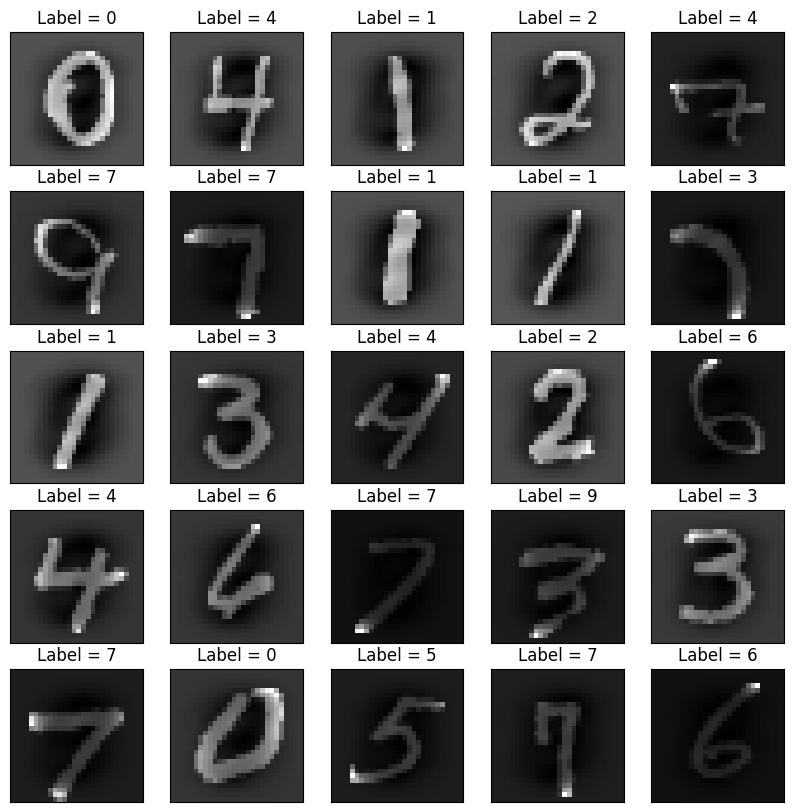

In [595]:
###############################################################################
# DISPLAY A SAMPLE
###############################################################################
m=25
plt.figure(figsize=(10,10))
for i in np.arange(m):
  ex_plot = plt.subplot(int(np.sqrt(m)),int(np.sqrt(m)),i+1)
  plt.imshow(X_test[i].reshape((28,28)), cmap='gray')
  ex_plot.set_xticks(()); ex_plot.set_yticks(())
  plt.title("Label = %i" % y_pred[i])

plt.show()

Le pourcentage d'erreurs pour l2 est de :  9.062857142857142
Le pourcentage d'erreurs pour l1 est de :  9.697142857142858


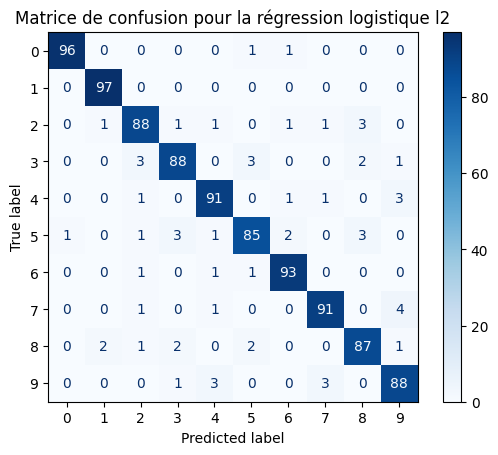

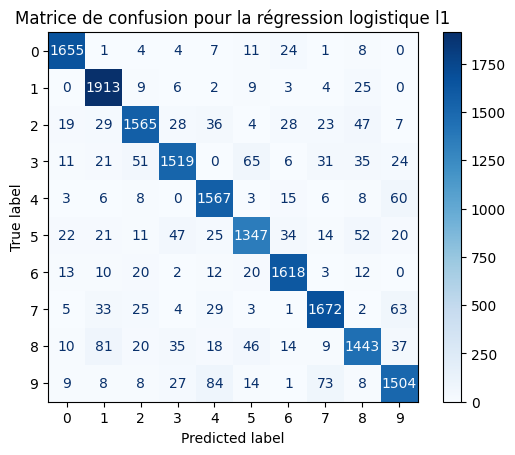

In [596]:
# Afficher les matrices de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rlog.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion pour la régression logistique l2")

disp = ConfusionMatrixDisplay(confusion_matrix=cm_l1, display_labels=rlog_l1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion pour la régression logistique l1")

print("Le pourcentage d'erreurs pour l2 est de : ", 100*sum(y_pred!=y_test)/len(y_pred))
print("Le pourcentage d'erreurs pour l1 est de : ", 100*sum(y_pred_l1!=y_test)/len(y_pred_l1))

Text(0.5, 0.98, 'Coefficients β pour chaque classe (l1)')

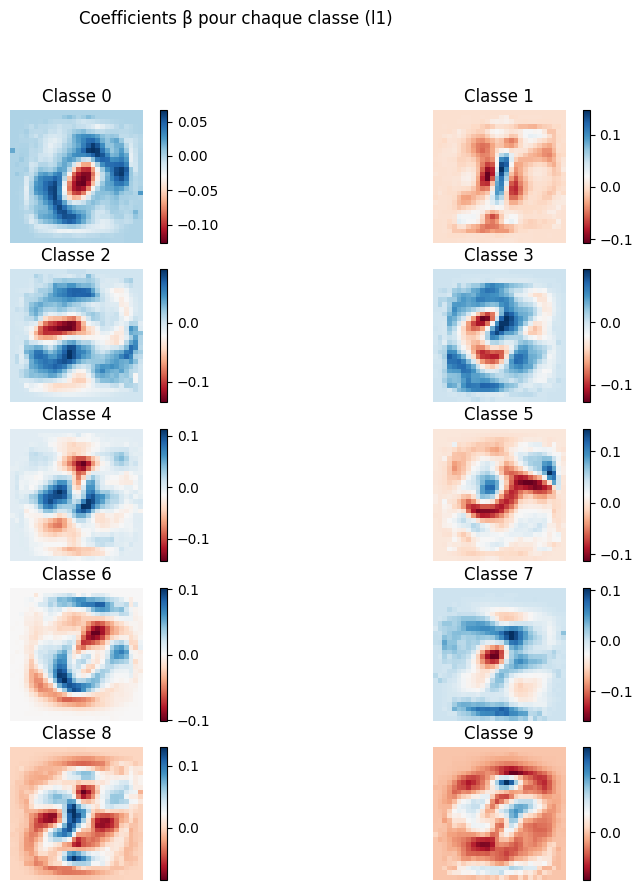

In [77]:
coef_l1 = rlog_l1.coef_
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(coef_l1[i].reshape(28, 28), cmap='RdBu')
    plt.title(f'Classe {i}')
    plt.colorbar()
    plt.axis('off')
plt.suptitle("Coefficients β pour chaque classe (l1)")

Text(0.5, 0.98, 'Coefficients β pour chaque classe (l2)')

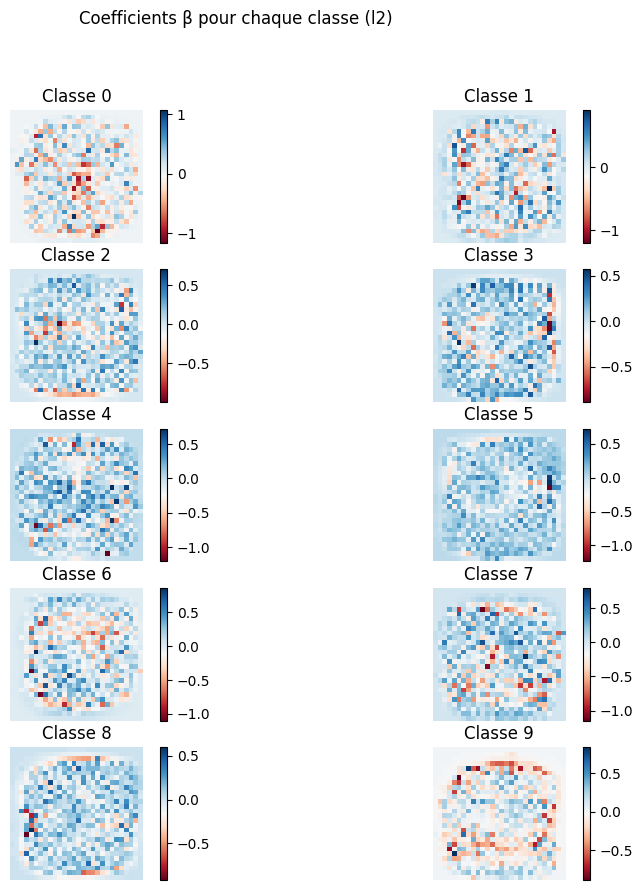

In [78]:
# Afficher les coefficients beta 
coef = rlog.coef_
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(coef[i].reshape(28, 28), cmap='RdBu')
    plt.title(f'Classe {i}')
    plt.colorbar()
    plt.axis('off')
plt.suptitle("Coefficients β pour chaque classe (l2)")

Question 2

Question 3